In [31]:
%pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl.metadata (2.7 kB)
  Using cached tensorflow_gpu-2.4.1-cp38-cp38-win_amd64.whl.metadata (2.7 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

2. KEYPOINT USING MP HOLISTIC

In [32]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [33]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [34]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [ ]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [35]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [36]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # # Draw landmarks
        draw_landmarks(image, results)
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [37]:
len(results.left_hand_landmarks.landmark)

21

In [38]:
results

mediapipe.python.solution_base.SolutionOutputs

In [39]:
draw_landmarks(frame, results)

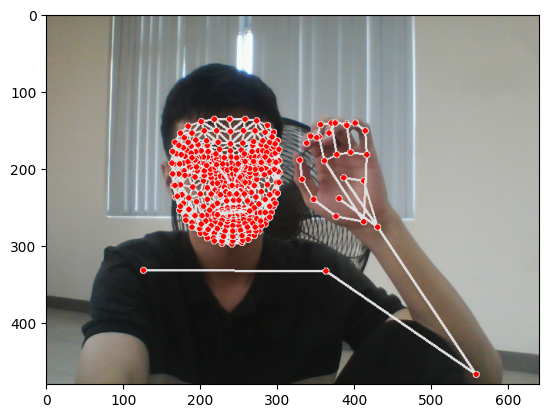

In [40]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

3. EXTRACT KEYPOINT VALUES

In [ ]:
results.pose_landmarks

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
len(results.pose_landmarks.landmark)

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()
pose.shape
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
face.shape
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() 
lh.shape
#rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [41]:
# def extract_keypoints(results):
#     pose = np.array([[res.x, res.y, res.z, res.visibility] for i, res in enumerate(results.pose_landmarks.landmark) if i not in range(23, 33)]).flatten() if results.pose_landmarks else np.zeros(23*4)
#     selected_face_landmarks = [
#         0, 2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 45, 48, 54, 60, 64, 68, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205, 209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 249, 253, 257, 261, 265, 269, 273, 277, 281, 285, 289, 293, 297, 301, 305, 309, 313, 317, 321, 325, 329, 333, 337, 341, 345, 349, 353, 357, 361, 365, 369, 373, 377, 381, 385, 389, 393, 397, 401, 405, 409, 413, 417, 421, 425, 429, 433, 437, 441, 445, 449, 453, 457, 461, 465
#     ]
#     #64 face landmark
#     face = np.array([[res.x, res.y, res.z] for i, res in enumerate(results.face_landmarks.landmark) if i in selected_face_landmarks]).flatten() if results.face_landmarks else np.zeros(len(selected_face_landmarks) * 3)
#     lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
#     rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
#     return np.concatenate([pose, face, lh, rh])

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for i, res in enumerate(results.pose_landmarks.landmark) if i not in range(23, 33)]).flatten() 
    selected_face_landmarks = [
        0, 2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 45, 48, 54, 60, 64, 68, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205, 209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 249, 253, 257, 261, 265, 269, 273, 277, 281, 285, 289, 293, 297, 301, 305, 309, 313, 317, 321, 325, 329, 333, 337, 341, 345, 349, 353, 357, 361, 365, 369, 373, 377, 381, 385, 389, 393, 397, 401, 405, 409, 413, 417, 421, 425, 429, 433, 437, 441, 445, 449, 453, 457, 461, 465
    ]
    #64 face landmark
    face = np.array([[res.x, res.y, res.z] for i, res in enumerate(results.face_landmarks.landmark) if i in selected_face_landmarks]).flatten()
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() 
    # rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() 
    
    return np.concatenate([pose, face, lh])


In [ ]:
# pose = np.array([[res.x, res.y, res.z, res.visibility] for i, res in enumerate(results.pose_landmarks.landmark) if i not in range(23, 33)]).flatten() if results.pose_landmarks else np.zeros(23*4)
# print(pose.shape)
# selected_face_landmarks = [
#         0, 2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 45, 48, 54, 60, 64, 68, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205, 209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 249, 253, 257, 261, 265, 269, 273, 277, 281, 285, 289, 293, 297, 301, 305, 309, 313, 317, 321, 325, 329, 333, 337, 341, 345, 349, 353, 357, 361, 365, 369, 373, 377, 381, 385, 389, 393, 397, 401, 405, 409, 413, 417, 421, 425, 429, 433, 437, 441, 445, 449, 453, 457, 461, 465
#     ]
#     64 face landmark
# face = np.array([[res.x, res.y, res.z] for i, res in enumerate(results.face_landmarks.landmark) if i in selected_face_landmarks]).flatten() if results.face_landmarks else np.zeros(len(selected_face_landmarks) * 3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
result_test = extract_keypoints(results)
print(len(result_test))
result_test

In [ ]:
np.save('0', result_test)

In [ ]:
np.load('0.npy')

In [ ]:

#ADD DIRECTORY FOR DATA STORAGE(TESTING)
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 
#Hoang
# actions = np.array(['Hello','HowAreYou','WhatsUp','GoodOrWell','Fine','Bad','Great','Nothing','Busy',
#                     'SoSo','Name','What','Work','Where','Deaf','Hearing','HardToHearing','Age',
#                     'Yes','No','Understand','DontUnderstand','Learn','ASL','Sign'
#            ])
#Ngan
# actions = np.array(['Always','Apple','Bowling','Carrot','Coffee','Dating','Father','Fifteen','Forget',
#                     'Future','Happy','Hour','HowMuch','More','Mother','Past','Peach','RightOrCorrect',
#                     'Sad','Same','Tea','Thirty','When','Who','Why'
#            ])
actions = np.array(['AgainOrRepeat','BathRoom','Chat','Come','DontLike','Favorite','Friend','Go','GoodBye',
                    'Have','HaventOrNotYet','Like','NiceToMeetYou','OhISee','Please','Ready','Restaurant',
                    'School','SeeYouLater','Slow','Sorry','TakeCare','Teacher','ThankYou','Want'
                    ])

#Thao
# actions = np.array(['Afternoon','Ask','Boy','Buy','Car','Communicate','Drink','FinishOrDone','Girl',
#                     'Give','Help','Home','I','Know','Love','Meet','Morning','MyOrMine','Need','Nice',
#                     'Night','Say','Wrong','You','Your'
#                     ])

#Trong
# actions = np.array(['AgainOrRepeat','Age','ASL','Bad','BathRoom','Busy','Chat','Come','Deaf','DontLike','DontUnderstand','Favorite','Fine','Friend','Go','GoodBye',
#                     'GoodOrWell','Great','HardToHearing','Have','HaventOrNotYet','Hearing','Hello','HowAreYou','Learn','Like','Name','NiceToMeetYou','No','Nothing','OhISee','Please','Ready','Restaurant',
#                     'School','SeeYouLater','Sign','Sorry','SoSo','TakeCare','Teacher','ThankYou','Understand','Want','What','WhatsUp','Where','Work','Yes'
#                     ])

# ----->action Slow hasn't finished yet


# actions = np.array(['Name','What','Work','Where','Deaf'
#                     ])

# actions = np.array(['awake','bye','dad','deaf','drink','eat','hello','i','know','learn','lie','like','listen','name','no','please',
#                     'sleep','sorry','stand','strong','student','teacher','thanks','unlucky','walk','what','yes','you'])


# 'Hello','How Are You','Whats up','Good','Fine','Bad','Great','Nothing','Busy','So-So',
#                     'Name','What','Work','Where','Deaf'
# ,'Hearing','Hard of Hearing','Age','Yes','No',
#                     'Understand','Dont Understand','Learn','ASL','Sign','Please','Sorry'

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 50 frames in length
sequence_length = 30

# Folder start
start_folder = 1
print(len(actions))

In [ ]:
#Fifteen videos worth of data
# Videos are going to 100 frames in length
for action in actions:
    # Ensure the action directory exists
    action_dir = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_dir):
        os.makedirs(action_dir)

    # Create directories for each sequence
    for sequence in range(1, no_sequences + 1):
        sequence_dir = os.path.join(action_dir, str(sequence))
        os.makedirs(sequence_dir, exist_ok=True)

In [ ]:
actions = np.array(['GoodBye'])
# actions = np.array(['Hello','HowAreYou','WhatsUp','GoodOrWell','Fine','Bad','Great','Nothing','Busy',
#                     'SoSo','Name','What','Work','Where','Deaf','Hearing','HardToHearing','Age',
#                     'Yes','No','Understand','DontUnderstand','Learn','ASL','Sign'
#            ])

# actions = np.array(['AgainOrRepeat','BathRoom','Chat','Come','DontLike','Favorite','Friend','Go','GoodBye',
#                     'Have','HaventOrNotYet','Like','NiceToMeetYou','OhISee','Please','Ready','Restaurant',
#                     'School','SeeYouLater','Slow','Sorry','TakeCare','Teacher','ThankYou','Want'
#                     ])

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
     
    # NEW LOOP
    # Loop through actions

    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

NORMALIZE DATA

In [ ]:
filenames = [str(i) for i in range(1, 31)]  # File names from '1' to '30'
actions = np.array(['AgainOrRepeat','BathRoom','Chat','Come','DontLike','Favorite','Friend','Go','GoodBye',
                    'Have','HaventOrNotYet','Like','NiceToMeetYou','OhISee','Please','Ready','Restaurant',
                    'School','SeeYouLater','Slow','Sorry','TakeCare','Teacher','ThankYou','Want'
                    ])
length_sequence = 29
# Iterate over each action
for action in actions:
    for filename in filenames:
        for i in range(length_sequence):
        # Load data from the .npy file
            file_path = os.path.join('MP_Data',action,filename ,"{}.npy".format(i))
            if os.path.exists(file_path):
                data = np.load(file_path)

                # Separate the data into pose, face, lh, and rh
                pose_data = data[:, :132*4]
                face_data = data[:, 132*4:132*4+468*3]
                lh_data = data[:, 132*4+468*3:132*4+468*3+21*3]
                rh_data = data[:, 132*4+468*3+21*3:]

                # Normalize each parameter independently
                pose_data_normalized = (pose_data - pose_data.mean(axis=0)) / pose_data.std(axis=0)
                face_data_normalized = (face_data - face_data.mean(axis=0)) / face_data.std(axis=0)
                lh_data_normalized = (lh_data - lh_data.mean(axis=0)) / lh_data.std(axis=0)
                rh_data_normalized = (rh_data - rh_data.mean(axis=0)) / rh_data.std(axis=0)

                # Concatenate the normalized parameters back together
                normalized_data = np.concatenate([pose_data_normalized, face_data_normalized, lh_data_normalized, rh_data_normalized], axis=1)

                # Save the normalized data to a new .npy file
                normalized_file_path = os.path.join('MP_DataN', action, filename , '{}_n.npy'.format(i))
                os.makedirs(os.path.dirname(normalized_file_path), exist_ok=True)
                np.save(normalized_file_path, normalized_data)

data = np.load('D:/MP_Data/AgainOrRepeat/1/28.npy')
print(data.shape)

In [ ]:
selected_face_landmarks = [
    # Eyebrows
    20, 21, 22, 23, 24,
    # Eyes
    38, 39, 42, 43,
    # Nose
    1, 4, 7, 10, 12, 13, 14, 15,
    # Mouth
    48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
    # Jawline
    3, 6, 9, 11, 16, 17, 18, 19, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 44, 45, 46, 47
]
print(len(selected_face_landmarks))

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
np.array(sequences).shape

In [ ]:
np.array(labels).shape

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [ ]:
y_test.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
# RECOVERY MODEL

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
# RECOVERY MODEL
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
#\Logs\train> tensorboard --logdir=.
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [ ]:
model.summary()

In [ ]:
res = model.predict(X_test)

In [ ]:
res

In [ ]:
actions[np.argmax(res[4])]

In [ ]:
actions[np.argmax(y_test[4])]

9. SAVE WEIGHTS

In [ ]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
model.load_weights('action.h5')

10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

11.TEST IN REAL TIME

In [ ]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        # sequence = sequence[-30:]
        sequence = sequence[-30:]
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            # image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()